# **Install required packages**

In [93]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

#import all the required library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score # Import roc_auc_score
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


import warnings
warnings.filterwarnings("ignore")
!pip install flask-ngrok tensorflow


In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Reading and understanding the data**

In [96]:
#load the dataset
creditcard_data = pd.read_csv("/content/drive/My Drive/creditcard.csv")

In [97]:
# print the 5 rows in head
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [98]:
# print the 5 rows in tail
creditcard_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [99]:
# Generate descriptive statistics and transpose for better readability
creditcard_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [100]:
creditcard_data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [101]:
# check the dataset shape
creditcard_data.shape

(284807, 31)

In [102]:
# Display basic information about the dataset
data_info = creditcard_data.info()  # Provides column data types and non-null counts
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [103]:
# Dataset describe
creditcard_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# **Handling missing values in columns**

In [104]:
# Cheking percent of missing values in columns
# check the missing value in the dataset
creditcard_data_missing_columns = (round(((creditcard_data.isnull().sum()/len(creditcard_data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
creditcard_data_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


# **Feature Scaling**

In [105]:
# Scale the 'Amount' and 'Time' columns
# The 'Amount' and 'Time' columns should be scaled because they have different ranges from the other features
creditcard_data['Normalized_Amount'] = StandardScaler().fit_transform(creditcard_data[['Amount']])
creditcard_data['Normalized_Time'] = StandardScaler().fit_transform(creditcard_data[['Time']])

# Drop the original 'Amount' and 'Time' columns
data = creditcard_data.drop(columns=['Amount', 'Time'])

In [106]:
# Preview the first few rows after scaling
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V22       V23       V24       V25  \
0  0.098698  0.363787  0.090794  ...  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425 -0.166974  ... -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  0.207643  ...  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024 -0.054952  ...  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  0.753074  ...  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Class  Normalized_Amount  Normalize

# **Checking the distribution of the classes**

In [107]:
# check the number of normal transaction and fraud transaction
creditcard_data.Class.value_counts()
# classes = creditcard_data['Class'].value_counts()
# classes

,count
Class,
0,284315
1,492


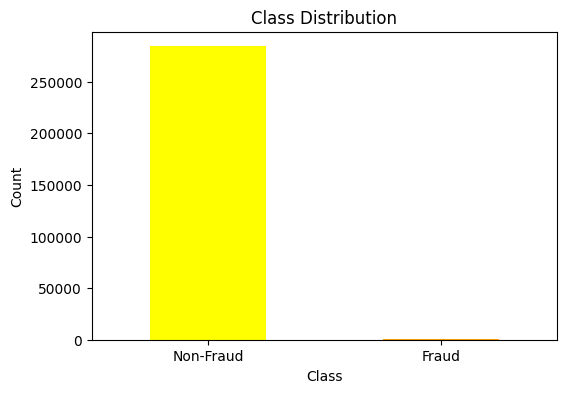

In [108]:
# Calculate the counts for each class
# 'Class' column typically contains labels like 0 (Non-Fraud) and 1 (Fraud)
class_counts = creditcard_data['Class'].value_counts()

# Define labels for the classes
class_labels = ['Non-Fraud', 'Fraud']

# Create a bar chart for the class distribution
plt.figure(figsize=(6, 4))  # Set the figure size
class_counts.plot(kind='bar', color=['yellow', 'orange'])  # Plot as a bar chart with specified colors
plt.title('Class Distribution')  # Set the title of the chart
plt.xticks(ticks=[0, 1], labels=class_labels, rotation=0)  # Set x-axis labels with no rotation
plt.ylabel('Count')  # Label for y-axis
plt.show()  # Display the plot

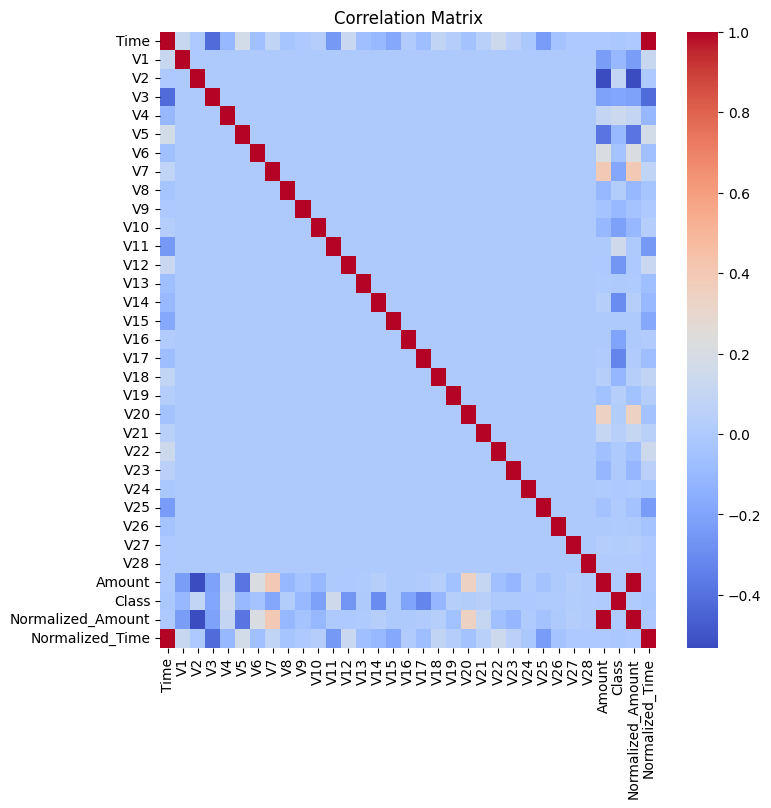

In [109]:
plt.figure(figsize=(8, 8))
sns.heatmap(creditcard_data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

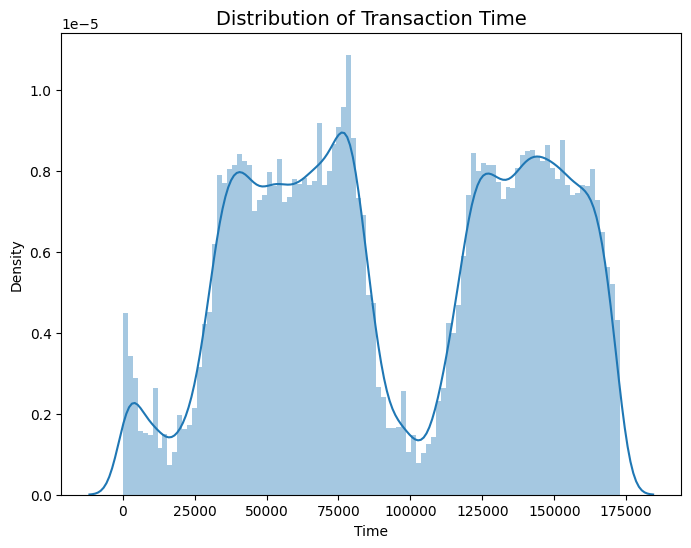

In [110]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(creditcard_data['Time'], bins=100)
plt.show()

In [111]:
# seprating the data analysis
nonfraud = creditcard_data[creditcard_data.Class == 0]
fraud = creditcard_data[creditcard_data.Class == 1]

In [112]:
print(nonfraud.shape)
print(fraud.shape)

(284315, 33)
(492, 33)


In [113]:
nt = len(nonfraud)/len(creditcard_data)*100
print(nt)

99.82725143693798


In [114]:
ft = len(fraud)/len(creditcard_data)*100
print(ft)

0.1727485630620034


In [ ]:
# Print the percentage of Non-Fraud (Class 0) transactions
print('No Frauds', round(creditcard_data['Class'].value_counts()[0] / len(creditcard_data) * 100, 2), '% of the dataset')
# Print the percentage of Fraud (Class 1) transactions
print('Frauds', round(creditcard_data['Class'].value_counts()[1] / len(creditcard_data) * 100, 2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [115]:
# seprating the data amount wise analysis
nonfraud.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [116]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


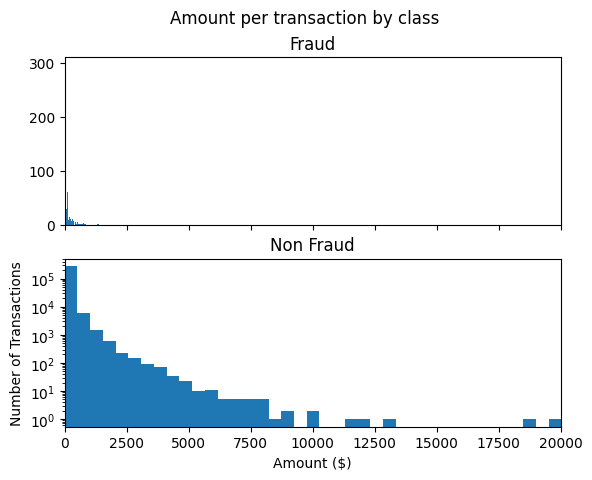

In [117]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(nonfraud.Amount, bins = bins)
ax2.set_title('Non Fraud')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

# **Splitting the data into Features & Targets**

In [118]:
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

# **Split the data into Training data & Testing Data**

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [120]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227845, 30) (56962, 30) (227845,) (56962,)


# **SMOTE**

In [121]:
# Check class distribution before SMOTE
print("Class distribution before SMOTE:\n", y.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:\n", pd.Series(y_train_smote).value_counts())

Class distribution before SMOTE:
 Class
0    284315
1       492
Name: count, dtype: int64
Class distribution after SMOTE:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [122]:
# Check shape of the new training data
print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_smote.shape)

Shape of X_train before SMOTE: (227845, 30)
Shape of X_train after SMOTE: (454902, 30)


In [123]:
# Preview the data after SMOTE
print(X_train_smote.head())

         V1        V2        V3        V4        V5        V6        V7  \
0  1.946747 -0.752526 -1.355130 -0.661630  1.502822  4.024933 -1.479661   
1  2.035149 -0.048880 -3.058693  0.247945  2.943487  3.298697 -0.002192   
2 -0.991920  0.603193  0.711976 -0.992425 -0.825838  1.956261 -2.212603   
3  2.285718 -1.500239 -0.747565 -1.668119 -1.394143 -0.350339 -1.427984   
4 -0.448747 -1.011440  0.115903 -3.454854  0.715771 -0.147490  0.504347   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  1.139880  1.406819 -0.157403  ...  0.076197  0.297537  0.307915  0.690980   
1  0.674782  0.045826  0.284864  ...  0.038628  0.228197  0.035542  0.707090   
2 -5.037523  0.000772 -2.009561  ... -2.798352  0.109526 -0.436530 -0.932803   
3  0.010010 -1.118447  1.756121  ... -0.139670  0.077013  0.208310 -0.538236   
4 -0.113817 -0.044782 -0.558955  ... -0.243245 -0.173298 -0.006692 -1.362383   

        V25       V26       V27       V28  Normalized_Amount  Normal

In [124]:
print(y_train_smote.head())

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


# **Hyper-Parameter Tuning (Model Train)**

In [125]:
model_params = {
    'logistic regression': {
        'model': LogisticRegression(),
        'parameter': {
            'solver': ['liblinear'],
            'C': [0.1, 1, 10],  # Regularization parameter
            'max_iter': [100, 200]
        }
    },
    'svm': {
        'model': svm.SVC(),
        'parameter': {
            'kernel': ['rbf', 'linear'],
            'C': [10, 15, 20]
        }
    },
    'decision tree': {
        'model': DecisionTreeClassifier(),
        'parameter': {
            'criterion': ['gini', 'entropy']
        }
    },
    'random forest': {
        'model': RandomForestClassifier(),
        'parameter': {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [50, 100, 200],
            'max_depth': [10, 20, None]
        }
    },
    'xgboost': {
        'model': XGBClassifier(),
        'parameter': {
            'n_estimators': [100, 200],
            'learning_rate': [0.01, 0.1, 0.3],
            'max_depth': [3, 5, 7],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    },
    'naive bayes': {
        'model': GaussianNB(),
        'parameter': {}  # Naive Bayes doesn't require hyperparameters by default
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'parameter': {
            'n_neighbors': [3, 5, 7, 10],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    }
}


In [ ]:
score = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['parameter'], cv=5, scoring='accuracy')
    clf.fit(X_train,y_train)
    score.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

cc_df = pd.DataFrame(score, columns = ['model', 'best_score', 'best_params'])
cc_df

KeyboardInterrupt: 

In [ ]:
# Logistic Regression Model
# Train a Logistic Regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_smote, y_train_smote)

# Evaluate Logistic Regression Model
y_pred_lr = model_lr.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_lr))

# Classification Report
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_lr))

# ROC-AUC Score
print("\nROC-AUC Score (Logistic Regression):", roc_auc_score(y_test, model_lr.predict_proba(X_test)[:, 1]))

Confusion Matrix (Logistic Regression):
 [[55406  1458]
 [    8    90]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962


ROC-AUC Score (Logistic Regression): 0.9698482164390798


In [ ]:
# XGBoost Model
# Train an XGBoost model
model_xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
model_xgb.fit(X_train_smote, y_train_smote)

# Evaluate XGBoost Model
y_pred_xgb = model_xgb.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, y_pred_xgb))

# Classification Report
print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
print("\nROC-AUC Score (XGBoost):", roc_auc_score(y_test, model_xgb.predict_proba(X_test)[:, 1]))


Confusion Matrix (XGBoost):
 [[56832    32]
 [   11    87]]

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score (XGBoost): 0.9791588308086319


In [ ]:
# Random Forest Model
# Train a Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_smote, y_train_smote)

# Evaluate Random Forest Model
y_pred_rf = model_rf.predict(X_test)

# Confusion Matrix
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score (if binary classification)
roc_auc = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
print("\nROC-AUC Score (Random Forest):", roc_auc)

Confusion Matrix (Random Forest):
 [[56847    17]
 [   18    80]]

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.91      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score (Random Forest): 0.9688299436966684


In [126]:
# Build a Neural Network Model
# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train_smote.shape[1]),  # Input layer
    Dropout(0.5),  # Dropout to prevent overfitting
    Dense(16, activation='relu'),  # Hidden layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the Neural Network Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Summarize the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the Neural Network Model
history = model.fit(
    X_train_smote, y_train_smote,
    epochs=50,  # Number of iterations through the training data
    batch_size=32,
    validation_split=0.2,  # Use 20% of the training data for validation
    verbose=1
)

# Evaluate the Neural Network Model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss (Neural Network): {test_loss}")
print(f"Test Accuracy (Neural Network): {test_accuracy}")

# Predict probabilities and convert to class labels
y_pred_probs_nn = model.predict(X_test)
y_pred_nn = (y_pred_probs_nn >= 0.5).astype(int)

# Confusion Matrix and Classification Report for Neural Network
cm_nn = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix (Neural Network):\n", cm_nn)
print("\nClassification Report (Neural Network):\n", classification_report(y_test, y_pred_nn))

Epoch 1/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 0.9249 - loss: 0.1853 - val_accuracy: 0.9913 - val_loss: 0.0405
Epoch 2/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.9819 - loss: 0.0458 - val_accuracy: 0.9964 - val_loss: 0.0269
Epoch 3/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.9851 - loss: 0.0387 - val_accuracy: 0.9947 - val_loss: 0.0231
Epoch 4/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9854 - loss: 0.0381 - val_accuracy: 0.9976 - val_loss: 0.0201
Epoch 5/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step - accuracy: 0.9866 - loss: 0.0356 - val_accuracy: 0.9985 - val_loss: 0.0166
Epoch 6/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.9869 - loss: 0.0351 - val_accuracy: 0.9973 - val_loss: 0.0239
Epoch 7/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step - accuracy: 0.9869 - loss: 0.0349 - val_accuracy: 0.9975 - val_loss: 0.0190
Epoch 8/50
11373/11373 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

# **Evaluating Model**

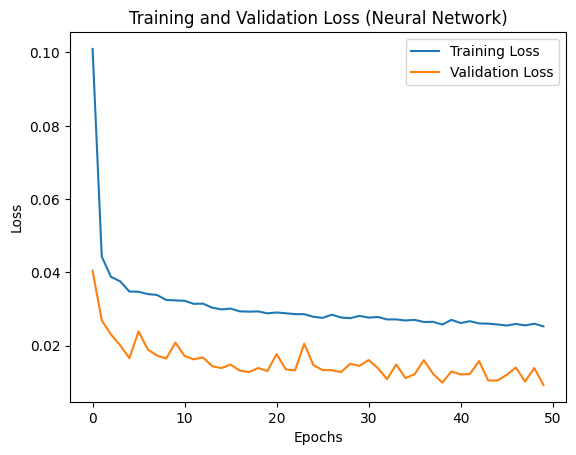

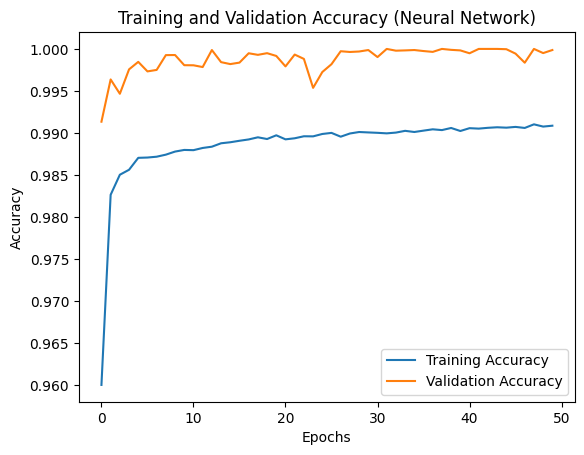

In [127]:
# Visualize Training Progress
# Plot Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Neural Network)')
plt.legend()
plt.show()
print("\n")
# Plot Training and Validation Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (Neural Network)')
plt.legend()
plt.show()

In [129]:
scores = model.evaluate(X_test, y_test)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3063 - loss: 0.8386


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


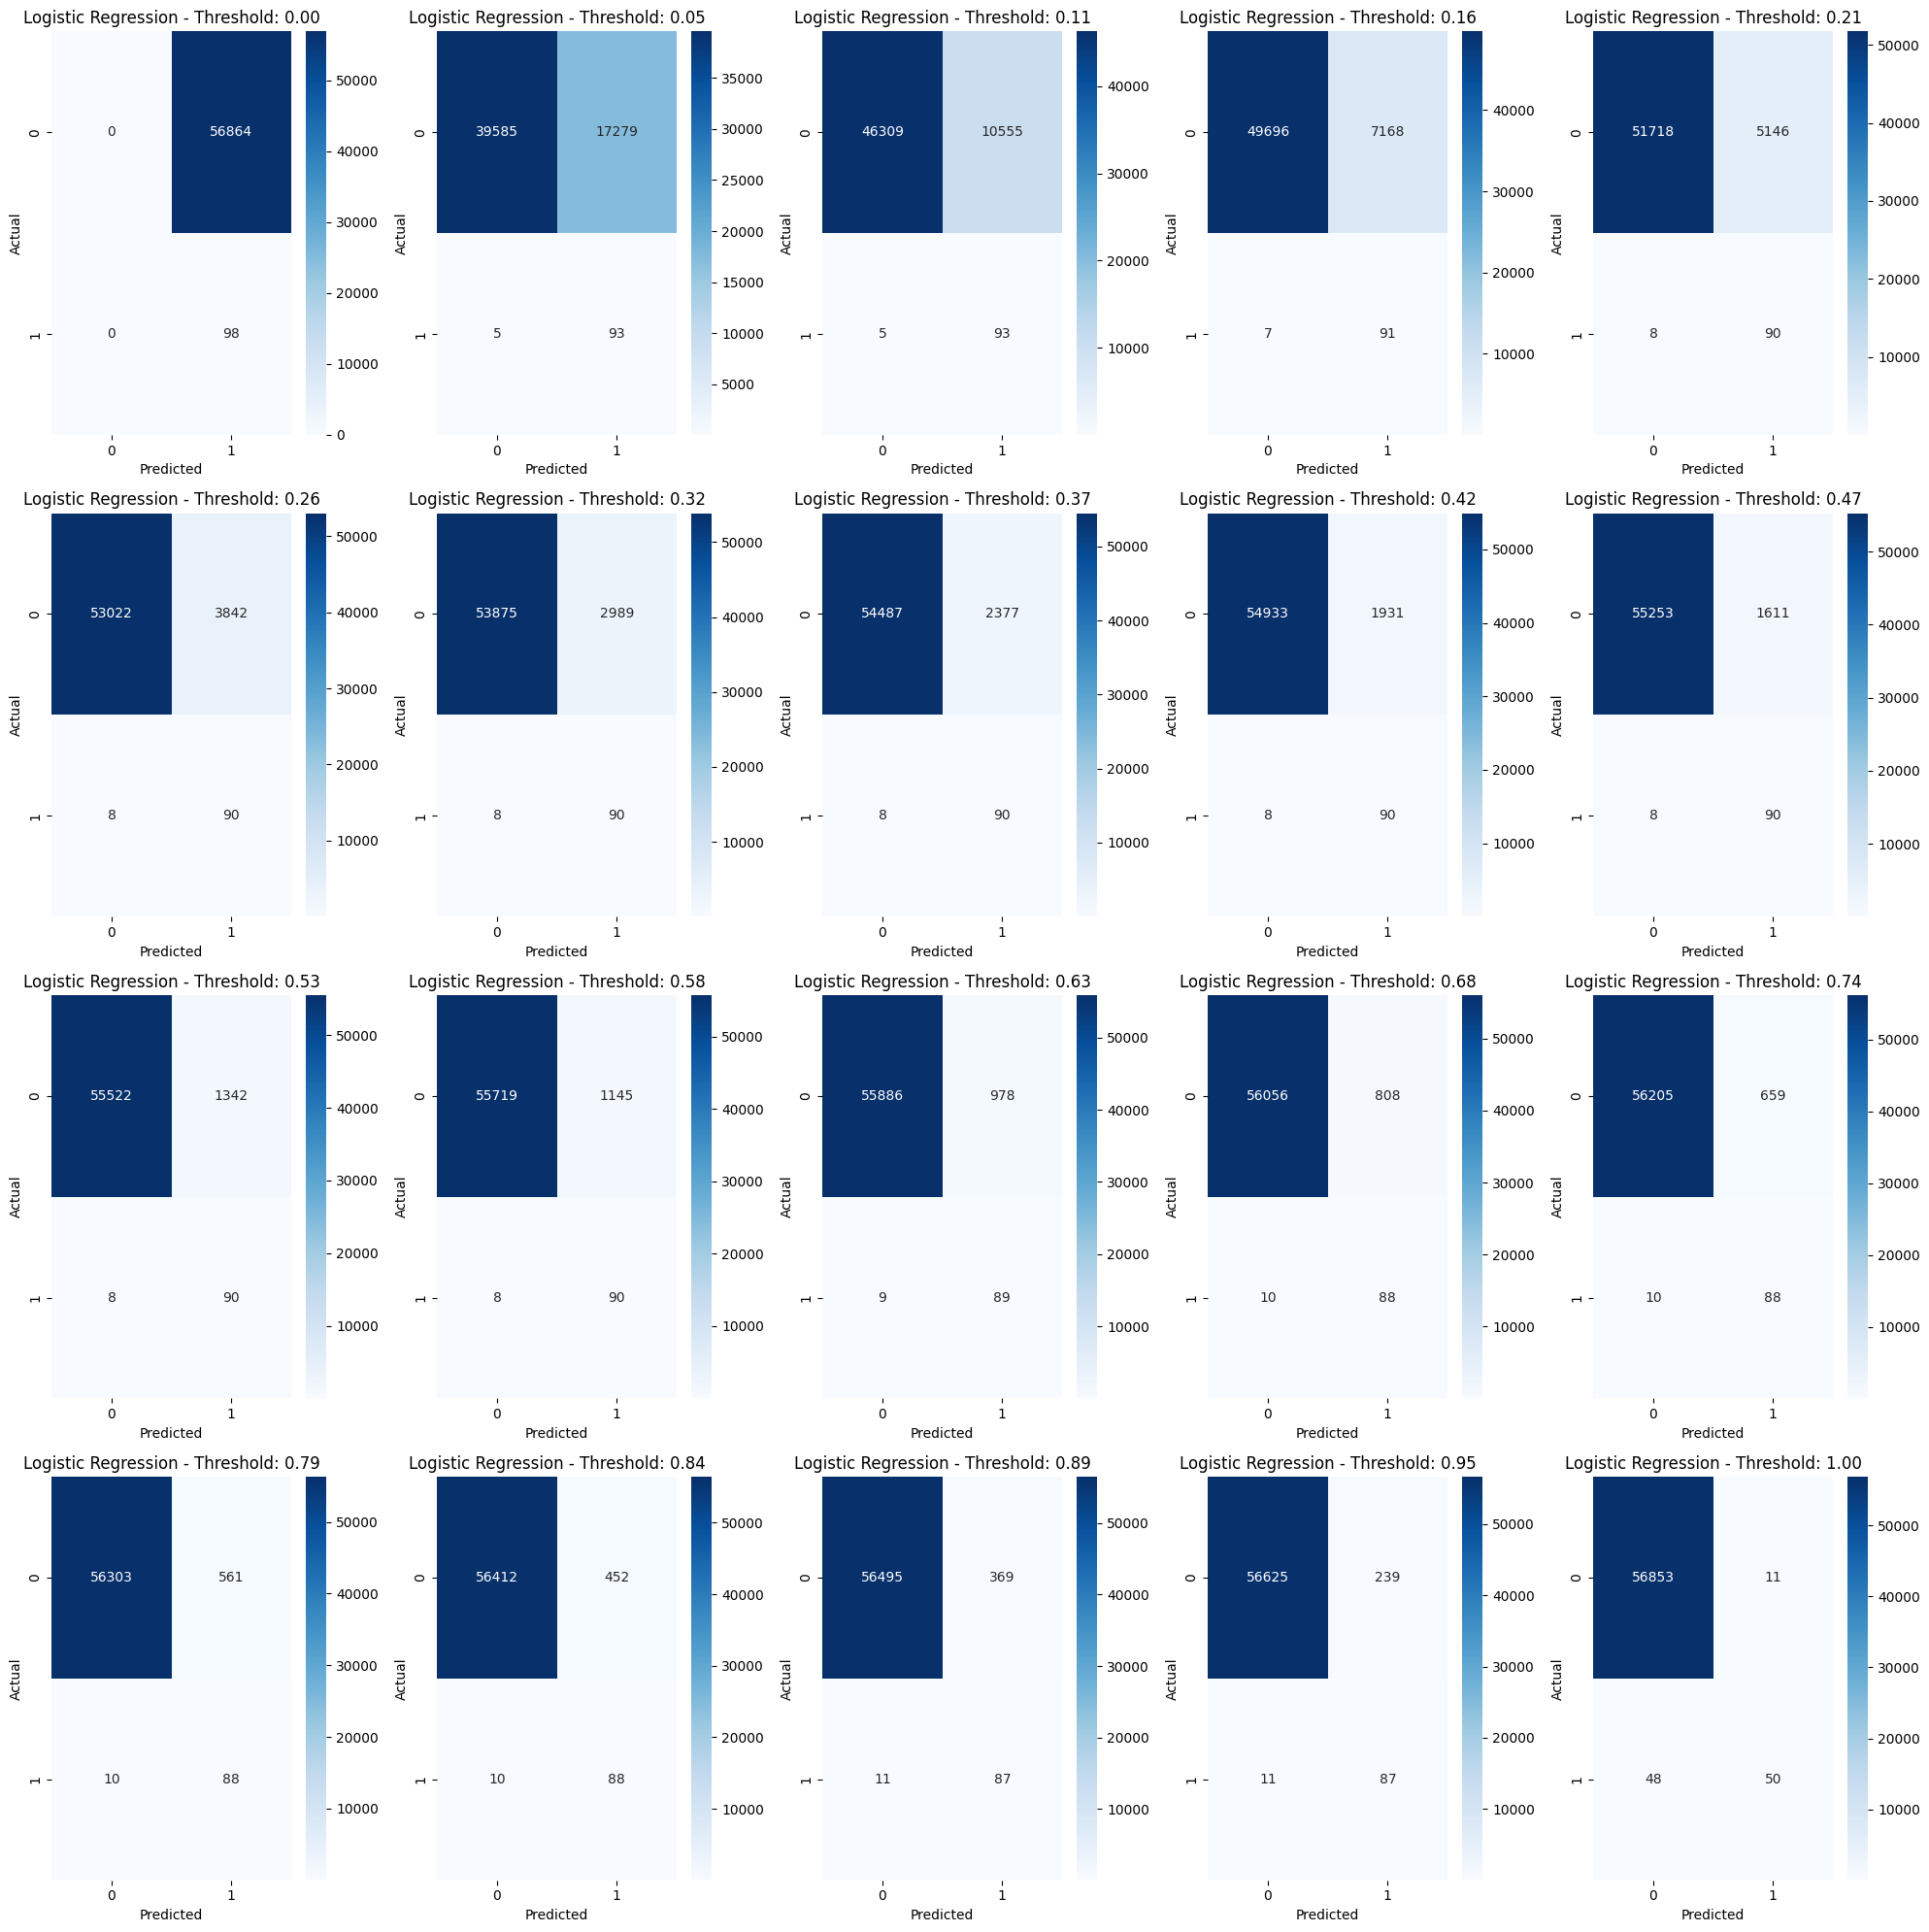

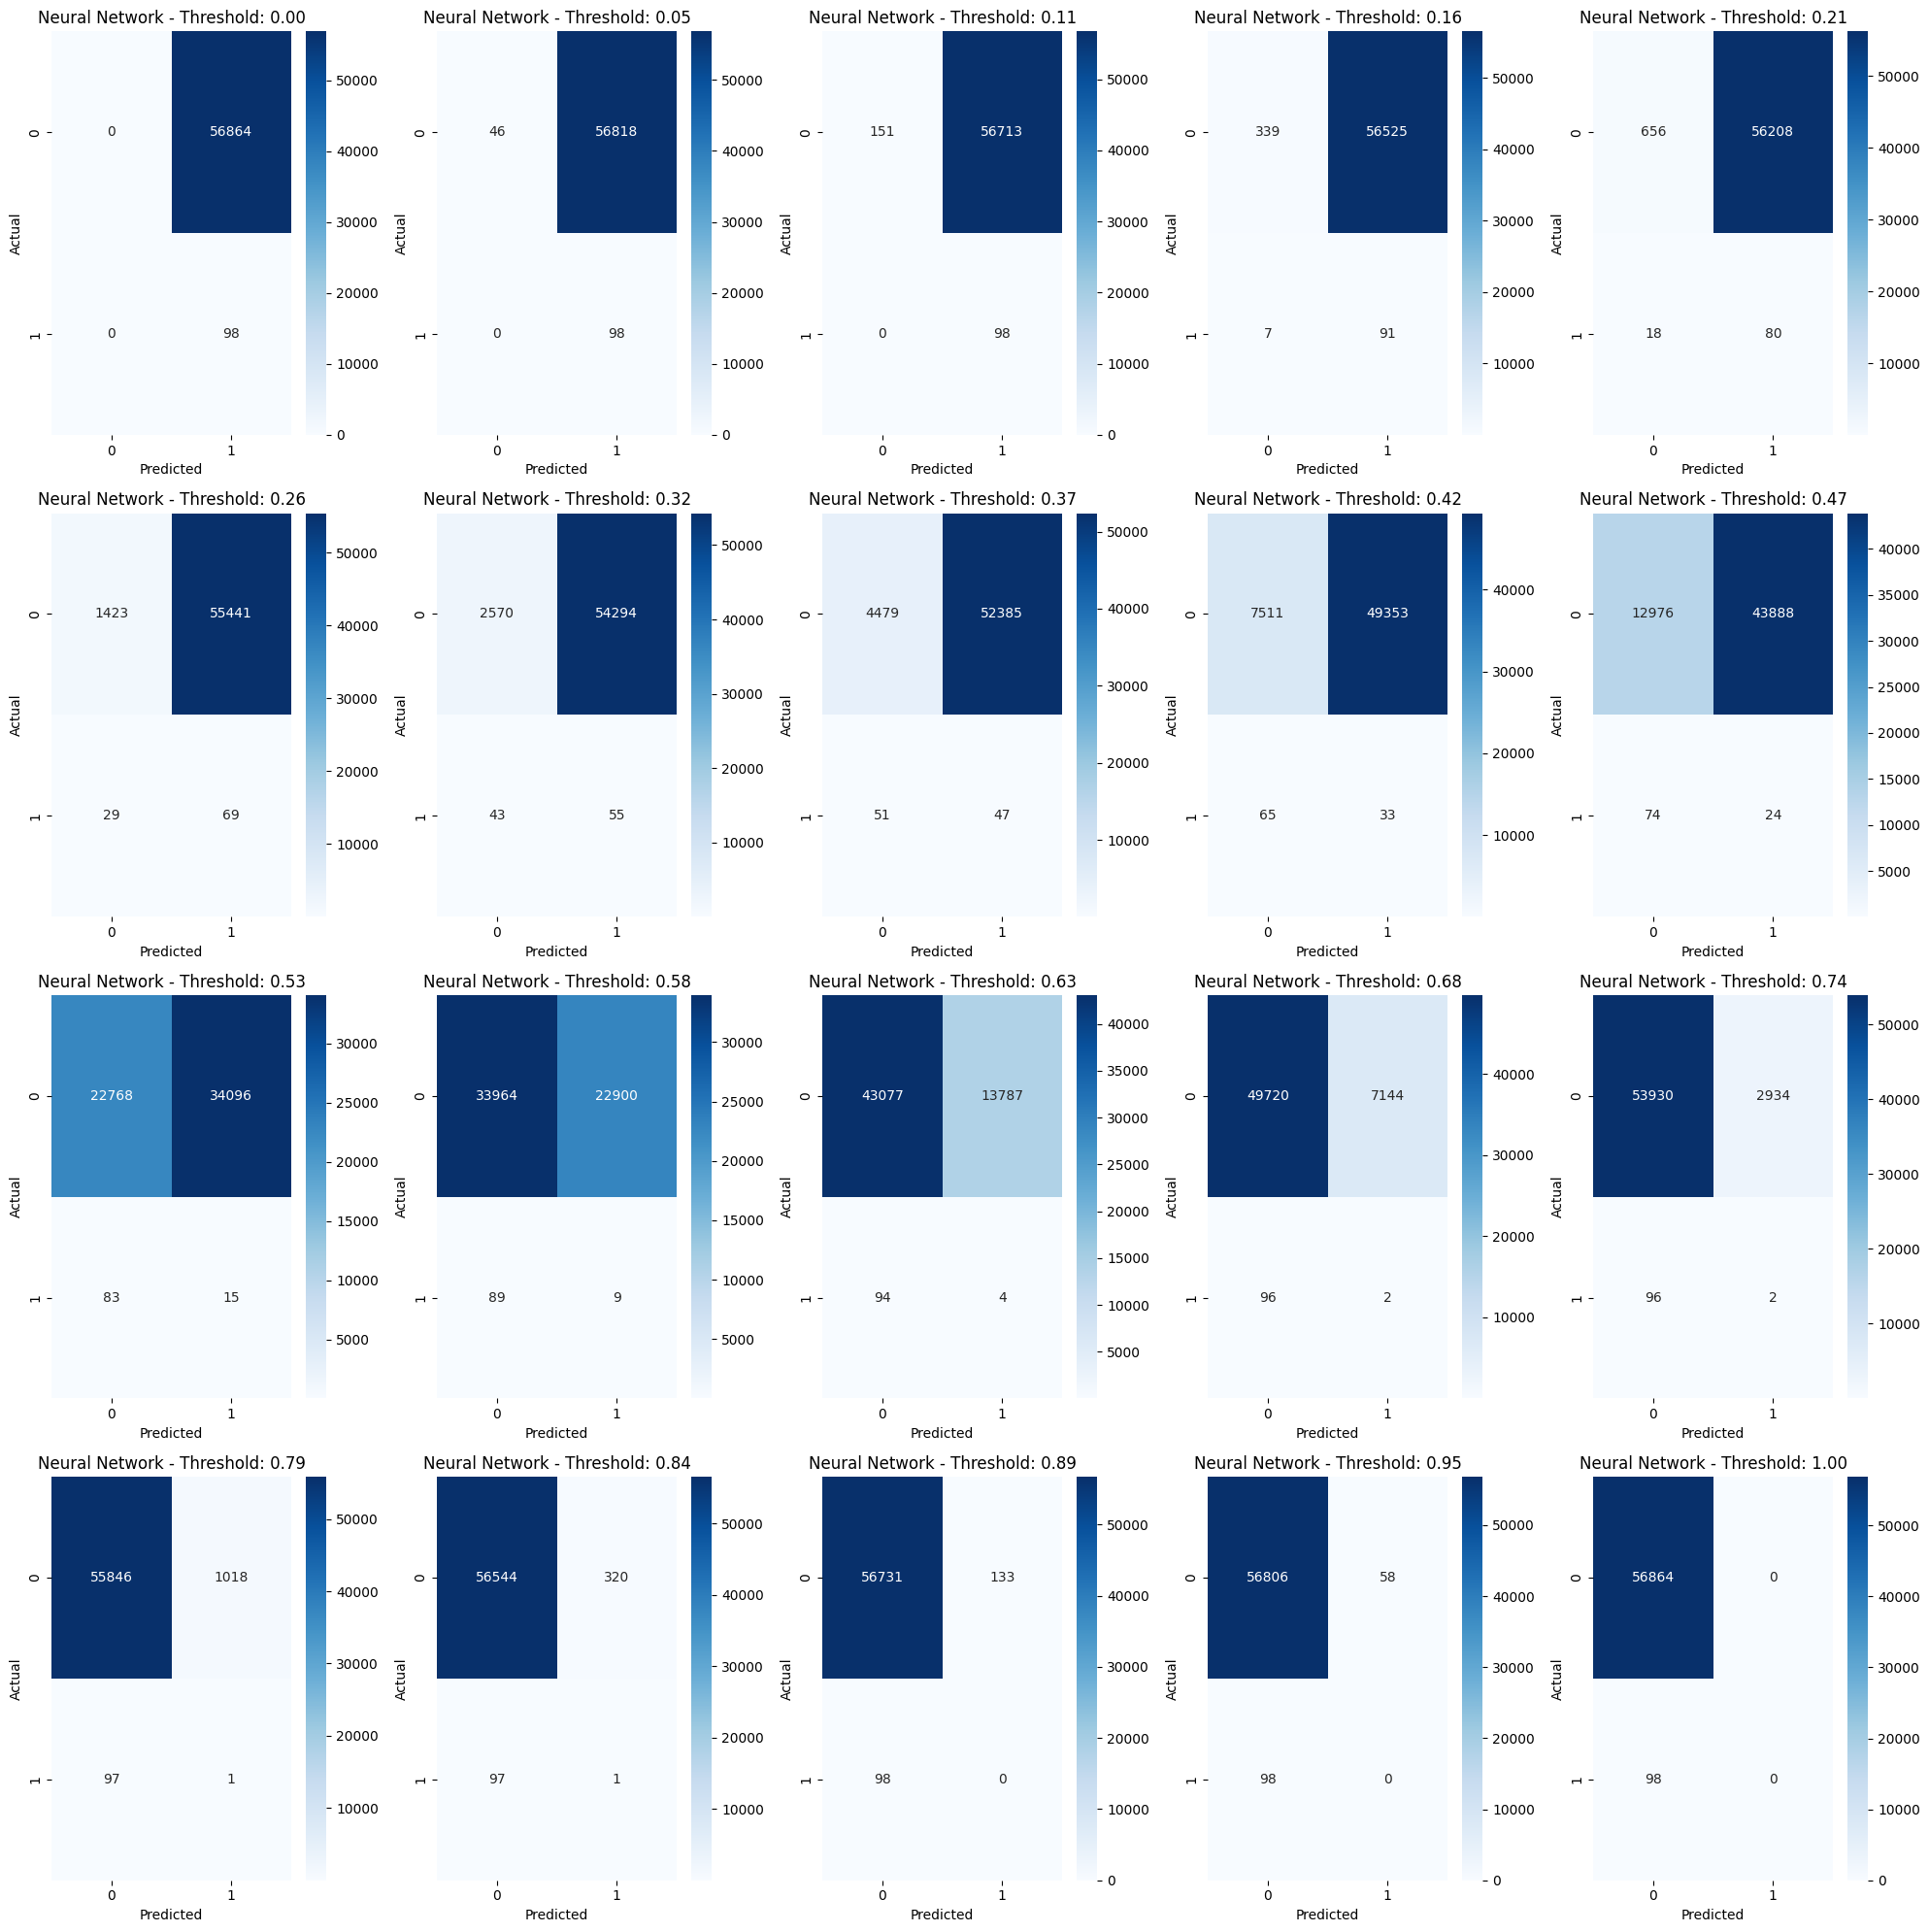

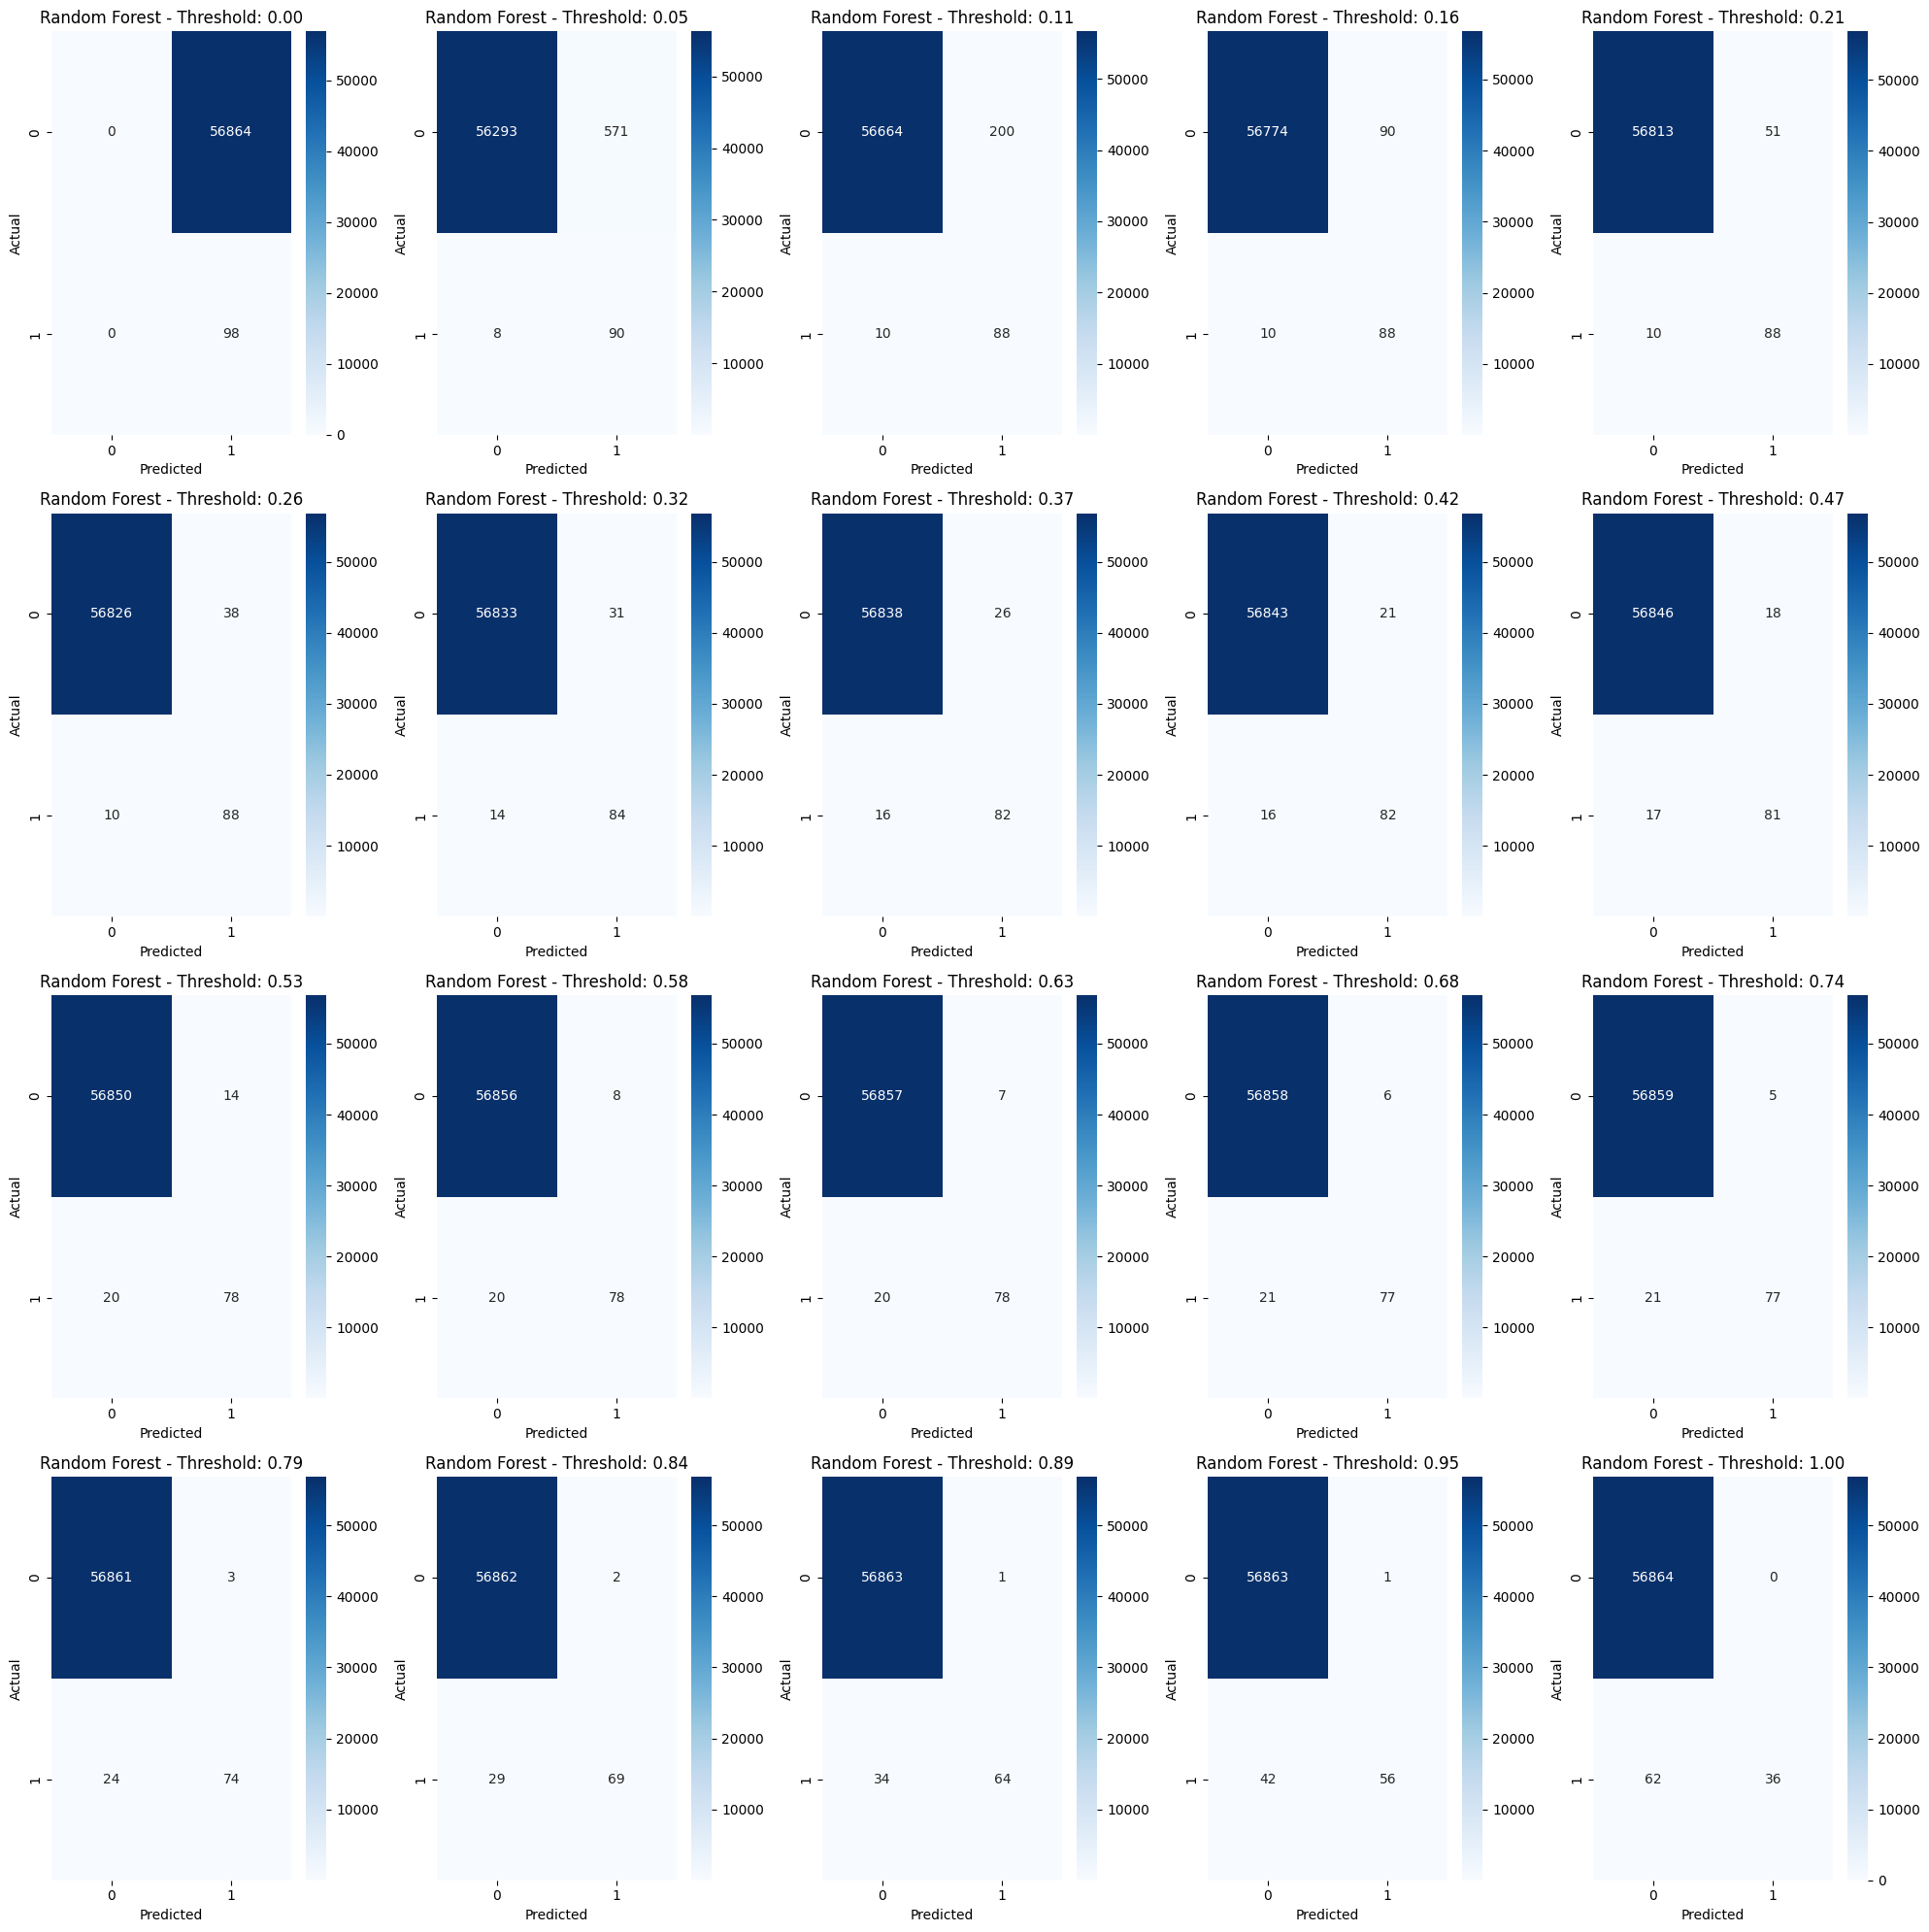

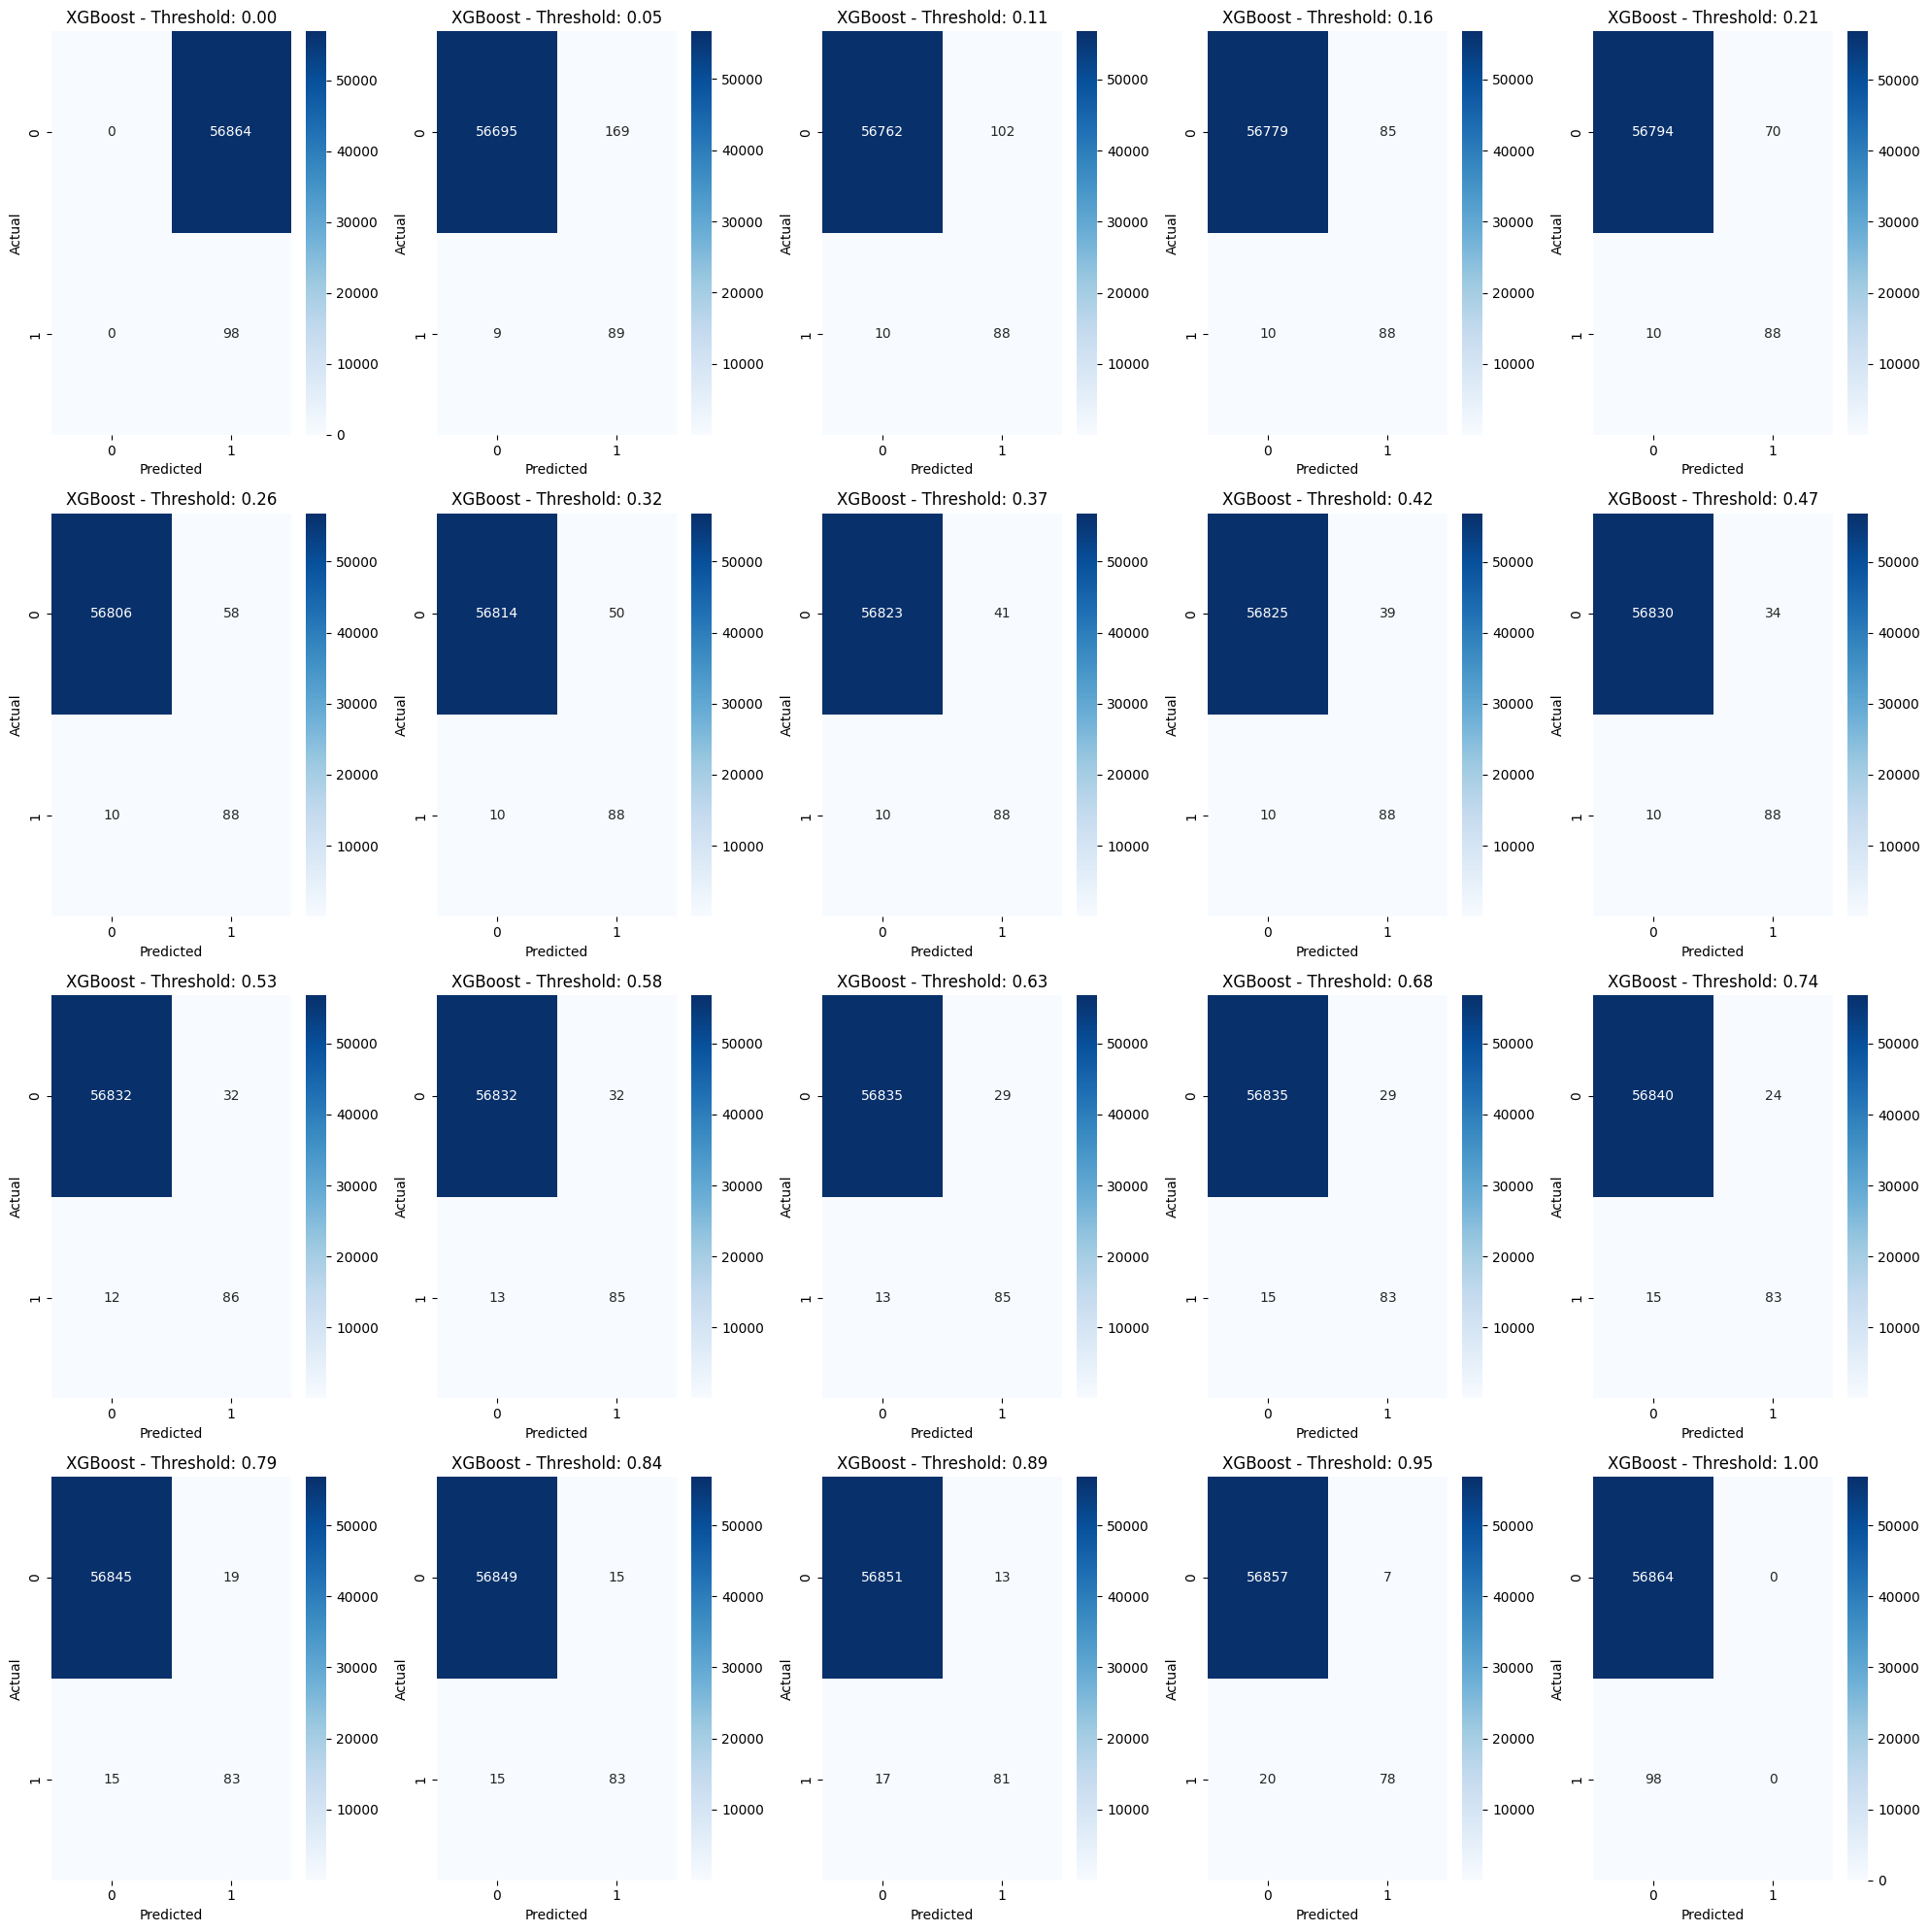

In [128]:
# Confusion Matrices for Different Thresholds (Logistic Regression, Random Forest, XGBoost, and Neural Network)
# Predict probabilities for the test set (Logistic Regression)
y_scores_lr = model_lr.predict_proba(X_test)[:, 1]

# Predict probabilities for the test set (Neural Network)
y_scores_nn = model.predict(X_test)  # Get probabilities (output of sigmoid)

# Predict probabilities for the test set (Random Forest)
y_scores_rf = model_rf.predict_proba(X_test)[:, 1]

# Predict probabilities for the test set (XGBoost)
y_scores_xgb = model_xgb.predict_proba(X_test)[:, 1]

# Ensure y_scores_nn is flattened
y_scores_nn = y_scores_nn.flatten()

# Define a range of thresholds
thresholds = np.linspace(0, 1, 20)  # Generate 20 thresholds between 0 and 1

# Function to plot confusion matrices for different thresholds
def plot_confusion_matrices(thresholds, y_test, y_scores, model_name):
    fig, axes = plt.subplots(4, 5, figsize=(20, 20))  # Create a grid of 4x5 plots
    axes = axes.ravel()  # Flatten the axes for easy iteration

    for i, threshold in enumerate(thresholds):
        # Generate predictions based on the threshold
        y_pred = (y_scores >= threshold).astype(int)

        # Compute the confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot the confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f"{model_name} - Threshold: {threshold:.2f}")
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

# Plot confusion matrices for Logistic Regression
plot_confusion_matrices(thresholds, y_test, y_scores_lr, "Logistic Regression")
print("\n")

# Plot confusion matrices for Neural Network
plot_confusion_matrices(thresholds, y_test, y_scores_nn, "Neural Network")
print("\n")

# Plot confusion matrices for Random Forest
plot_confusion_matrices(thresholds, y_test, y_scores_rf, "Random Forest")  # Correct model name and scores
print("\n")

# Plot confusion matrices for XGBoost
plot_confusion_matrices(thresholds, y_test, y_scores_xgb, "XGBoost")  # Correct model name and scores
print("\n")


--- Logistic Regression Evaluation ---
Confusion Matrix at threshold 0.00 (Logistic Regression):
[[    0 56864]
 [    0    98]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56864
           1       0.00      1.00      0.00        98

    accuracy                           0.00     56962
   macro avg       0.00      0.50      0.00     56962
weighted avg       0.00      0.00      0.00     56962

ROC-AUC Score at threshold 0.00 (Logistic Regression): 0.9698482164390798
--------------------------------------------------
Confusion Matrix at threshold 0.11 (Logistic Regression):
[[46797 10067]
 [    5    93]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90     56864
           1       0.01      0.95      0.02        98

    accuracy                           0.82     56962
   macro avg       0.50      0.89      0.46     56962
weighted avg       1.00      0.82      0.90     56962

ROC

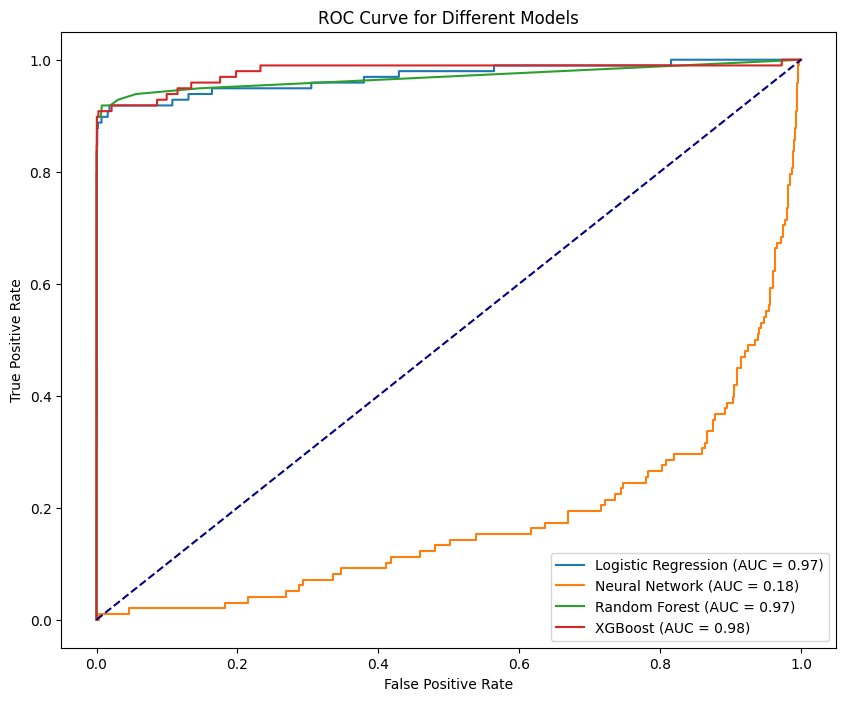

In [130]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf

# Define a range of thresholds
thresholds = np.linspace(0, 1, 10)

# Define a function to plot confusion matrix for different thresholds
def plot_confusion_matrix_at_thresholds(model, X_test, y_test, thresholds, model_name):
    # Check if the model is a Keras Sequential model
    if isinstance(model, tf.keras.models.Sequential):
        y_scores = model.predict(X_test)  # Get probabilities directly from predict for Keras Sequential
        y_scores = y_scores.flatten()  # Flatten the output if necessary
    else:
        y_scores = model.predict_proba(X_test)[:, 1]  # Get probability of positive class for other models

    for threshold in thresholds:
        y_pred = (y_scores >= threshold).astype(int)
        cm = confusion_matrix(y_test, y_pred)
        print(f"Confusion Matrix at threshold {threshold:.2f} ({model_name}):")
        print(cm)
        print(classification_report(y_test, y_pred))
        print(f"ROC-AUC Score at threshold {threshold:.2f} ({model_name}):", roc_auc_score(y_test, y_scores))
        print("-" * 50)

# Evaluate Logistic Regression
print("\n--- Logistic Regression Evaluation ---")
plot_confusion_matrix_at_thresholds(model_lr, X_test, y_test, thresholds, 'Logistic Regression')

# Evaluate Neural Network
print("\n--- Neural Network Evaluation ---")
plot_confusion_matrix_at_thresholds(model, X_test, y_test, thresholds, 'Neural Network')

# Evaluate Random Forest
print("\n--- Random Forest Evaluation ---")
plot_confusion_matrix_at_thresholds(model_rf, X_test, y_test, thresholds, 'Random Forest')

# Evaluate XGBoost
print("\n--- XGBoost Evaluation ---")
plot_confusion_matrix_at_thresholds(model_xgb, X_test, y_test, thresholds, 'XGBoost')

# Optional: Plot ROC Curve for all models
plt.figure(figsize=(10, 8))

for model, label in zip([model_lr, model, model_rf, model_xgb],
                        ['Logistic Regression', 'Neural Network', 'Random Forest', 'XGBoost']):
    if isinstance(model, tf.keras.models.Sequential):
        y_scores = model.predict(X_test).flatten()  # For Keras models, use predict
    else:
        y_scores = model.predict_proba(X_test)[:, 1]  # For other models, use predict_proba

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc_score(y_test, y_scores):.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend(loc='lower right')
plt.show()


# **Save Model**

In [131]:
import pickle

# Assuming 'model' is your trained Scikit-learn model
with open('Credit_Card_Fraud_Detection.pkl', 'wb') as f:
    pickle.dump(model, f)

# **Flask AI Deploy**

In [132]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok
import tensorflow as tf
import numpy as np
import os

# Inisialisasi Flask
app = Flask(__name__)
run_with_ngrok(app)  # Menambahkan ngrok untuk URL publik

# Update the model path to point to the directory containing model files
model_path = 'Credit_Card_Fraud_Detection.pkl'  # or the correct path if it's not in the current directory

# Muat model yang telah dilatih
with open('Credit_Card_Fraud_Detection.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

@app.route('/')
def home():
    return "Credit Card Fraud Detection API is Running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Ambil data dari permintaan
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)

        # Prediksi menggunakan model
        prediction = model.predict(features)
        prediction_class = (prediction > 0.5).astype(int).tolist()

        return jsonify({
            'prediction_prob': prediction.tolist(),
            'prediction_class': prediction_class
        })
    except Exception as e:
        return jsonify({'error': str(e)}), 400

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
Exception in thread Thread-16:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connection.py", line 199, in _new_conn
    sock = connection.create_connection(
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 85, in create_connection
    raise err
  File "/usr/local/lib/python3.10/dist-packages/urllib3/util/connection.py", line 73, in create_connection
    sock.connect(sa)
ConnectionRefusedError: [Errno 111] Connection refused

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py", line 789, in urlopen
    response = self._make_request(
  File "/usr/local/lib/python3.10/dist-packages/urll

# **Front End Template**

In [133]:
from IPython.display import display, HTML

html_code = """
<!DOCTYPE html>
<html lang="en">

<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>CreditScan</title>
    <style>
        * {
            margin: 0;
            padding: 0;
            box-sizing: border-box;
        }

        body {
            font-family: Arial, sans-serif;
            background-color: white;
            color: #333;
        }
        .navbar {
            background-color: #0074D9;
            color: white;
            padding: 1em 0;
            text-align: center;
            font-size: 1.5em;
            font-weight: bold;
        }
        .description {
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 2em;
        }
        .description img {
            max-width: 50%;
            border-radius: 10px;
            margin-right: 2em;
        }
        .description .text {
            max-width: 40%;
            font-size: 1.2em;
            line-height: 1.8;
        }
        .input-section {
            display: flex;
            justify-content: center;
            align-items: flex-start;
            margin: 2em 0;
        }
        .input-section .input-form, .input-section .result-display {
            width: 45%;
            padding: 2em;
            background-color: white;
            border-radius: 10px;
            box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);
            margin: 0 1em;
        }
        .input-section h3 {
            margin-bottom: 1em;
            color: #0074D9;
        }
        .input-section .input-form form {
            display: flex;
            flex-direction: column;
            max-height: 300px;
            overflow-y: scroll;
        }
        .input-section .input-form form input {
            margin-bottom: 0.8em;
            padding: 0.5em;
            border: 1px solid #ddd;
            border-radius: 5px;
            font-size: 1em;
        }
        .input-section .input-form form button {
            padding: 0.7em;
            background-color: #0074D9;
            color: white;
            border: none;
            border-radius: 5px;
            font-size: 1em;
            cursor: pointer;
            margin-top: 1em;
        }
        .input-section .input-form form button:hover {
            background-color: #005bb5;
        }
        .result-display {
            display: flex;
            justify-content: center;
            align-items: center;
            font-size: 1.5em;
            font-weight: bold;
            color: #555;
        }
    </style>
</head>
<body>
    <div class="navbar">
        CreditScan
    </div>

    <div class="description">
        <img src="AI.jpg" alt="AI Image" height="300px" width="500px">
        <div class="text">
            <p>
                Welcome to <b>CreditScan</b>, the AI-powered tool for detecting fraudulent credit cards.
                Our system analyzes data from credit cards to determine whether they are real or fake.
                Input your data on the right, and let our AI verify it in seconds!
            </p>
        </div>
    </div>

    <div class="input-section">
        <div class="input-form">
            <h3>Enter Credit Card Data</h3>
            <form id="credit-form">
                <!-- Generate 30 inputs -->
                <script>
                    for (let i = 1; i <= 30; i++) {
                        document.write(`<input type="text" placeholder="Input Field ${i}" required>`);
                    }
                </script>
                <button type="submit">Check Validity</button>
            </form>
        </div>

        <div class="result-display" id="result">
            Result will appear here.
        </div>
    </div>

    <script>
        const form = document.getElementById('credit-form');
        const resultDisplay = document.getElementById('result');

        form.addEventListener('submit', function(e) {
            e.preventDefault();
            // Mock AI result for demonstration purposes
            const isReal = Math.random() > 0.5; // Random true/false
            resultDisplay.textContent = isReal ? "The Credit Card is REAL." : "The Credit Card is FAKE.";
            resultDisplay.style.color = isReal ? "green" : "red";
        });
    </script>
</body>
</html>
"""

# Menampilkan HTML
display(HTML(html_code))

# **Testing the model with real case**

**Versi Input dari Data Definition**

In [134]:
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open('Credit_Card_Fraud_Detection.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

# Function to create a DataFrame from input variables
def create_input_dataframe(input_data):
    # Create a DataFrame from the input data
    columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
               'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
               'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
               'V26', 'V27', 'V28', 'Normalized_Amount', 'Normalized_Time']

    # Create a DataFrame with the input data
    df = pd.DataFrame([input_data], columns=columns)
    return df

# Function to make predictions
def predict_fraud(model, data):
    # Make predictions
    predictions = model.predict(data)
    return predictions

# Input data (example)
input_data = {
    'V1': -0.072781173,
    'V2': 2.536346738,
    'V3': 1.378155224,
    'V4': -0.33832077,
    'V5': 0.462387778,
    'V6': 0.239598554,
    'V7': 0.098697901,
    'V8': 0.36378697,
    'V9': 0.090794172,
    'V10': -0.551599533,
    'V11': -0.617800856,
    'V12': -0.991389847,
    'V13': -0.311169354,
    'V14': 1.468176972,
    'V15': -0.470400525,
    'V16': 0.207971242,
    'V17': 0.02579058,
    'V18': 0.40399296,
    'V19': 0.251412098,
    'V20': -0.018306778,
    'V21': 0.277837576,
    'V22': -0.11047391,
    'V23': 0.066928075,
    'V24': 0.128539358,
    'V25': -0.189114844,
    'V26': 0.133558377,
    'V27': -0.021053053,
    'V28': 149.62,
    'Normalized_Amount': 0.244964,  # Placeholder, you need to provide the normalized value
    'Normalized_Time': -1.996583     # Placeholder, you need to provide the normalized value
}

# Create DataFrame from input data
data_to_predict = create_input_dataframe(input_data)

# Make predictions
predictions = predict_fraud(model_loaded, data_to_predict)

# Prepare results
results = {
    'predictions': predictions.tolist(),
    'predicted_classes': (predictions > 0.5).astype(int).tolist()
}

# Display results
print(f"Predictions: {results['predictions']}")
print(f"Predicted Class: {'Fraud' if results['predicted_classes'][0] == 1 else 'Non-Fraud'}")

Predictions: [0]
Predicted Class: Non-Fraud


**Versi Input Dari User Input**

In [135]:
import pandas as pd
import numpy as np
import pickle

# Load the trained model
with open('Credit_Card_Fraud_Detection.pkl', 'rb') as f:
    model_loaded = pickle.load(f)

# Function to create a DataFrame from input variables
def create_input_dataframe(input_data):
    # Create a DataFrame from the input data
    columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
               'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17',
               'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
               'V26', 'V27', 'V28', 'Normalized_Amount', 'Normalized_Time']

    # Create a DataFrame with the input data
    df = pd.DataFrame([input_data], columns=columns)
    return df

# Function to make predictions
def predict_fraud(model, data):
    # Make predictions
    predictions = model.predict(data)
    return predictions

# Function to get user input
def get_user_input():
    input_data = {}
    input_data['V1'] = float(input("Enter V1: "))
    input_data['V2'] = float(input("Enter V2: "))
    input_data['V3'] = float(input("Enter V3: "))
    input_data['V4'] = float(input("Enter V4: "))
    input_data['V5'] = float(input("Enter V5: "))
    input_data['V6'] = float(input("Enter V6: "))
    input_data['V7'] = float(input("Enter V7: "))
    input_data['V8'] = float(input("Enter V8: "))
    input_data['V9'] = float(input("Enter V9: "))
    input_data['V10'] = float(input("Enter V10: "))
    input_data['V11'] = float(input("Enter V11: "))
    input_data['V12'] = float(input("Enter V12: "))
    input_data['V13'] = float(input("Enter V13: "))
    input_data['V14'] = float(input("Enter V14: "))
    input_data['V15'] = float(input("Enter V15: "))
    input_data['V16'] = float(input("Enter V16: "))
    input_data['V17'] = float(input("Enter V17: "))
    input_data['V18'] = float(input("Enter V18: "))
    input_data['V19'] = float(input("Enter V19: "))
    input_data['V20'] = float(input("Enter V20: "))
    input_data['V21'] = float(input("Enter V21: "))
    input_data['V22'] = float(input("Enter V22: "))
    input_data['V23'] = float(input("Enter V23: "))
    input_data['V24'] = float(input("Enter V24: "))
    input_data['V25'] = float(input("Enter V25: "))
    input_data['V26'] = float(input("Enter V26: "))
    input_data['V27'] = float(input("Enter V27: "))
    input_data['V28'] = float(input("Enter V28: "))
    input_data['Normalized_Amount'] = float(input("Enter Normalized Amount: "))  # Placeholder for normalized value
    input_data['Normalized_Time'] = float(input("Enter Normalized Time: "))      # Placeholder for normalized value

    return input_data

# Get user input
input_data = get_user_input()

# Create DataFrame from input data
data_to_predict = create_input_dataframe(input_data)

# Make predictions
predictions = predict_fraud(model_loaded, data_to_predict)

# Prepare results
results = {
    'predictions': predictions.tolist(),
    'predicted_classes': (predictions > 0.5).astype(int).tolist()
}

# Display results
print(f"Predictions: {results['predictions']}")
print(f"Predicted Class: {'Fraud' if results['predicted_classes'][0] == 1 else 'Non-Fraud'}")

Enter V1: 1
Enter V2: 1
Enter V3: 1
Enter V4: 1
Enter V5: 1
Enter V6: 1
Enter V7: 1
Enter V8: 1
Enter V9: 1
Enter V10: 1
Enter V11: 1
Enter V12: 1
Enter V13: 1
Enter V14: 1
Enter V15: 1
Enter V16: 1
Enter V17: 1
Enter V18: 1
Enter V19: 1
Enter V20: 1
Enter V21: 1
Enter V22: 1
Enter V23: 1
Enter V24: 1
Enter V25: 1
Enter V26: 1
Enter V27: 1
Enter V28: 1
Enter Normalized Amount: 1
Enter Normalized Time: 1
Predictions: [0]
Predicted Class: Non-Fraud
